# Homework 1
Simulate a random walk with exit condition (drunk man on the edge of a cliff).
 - $X_n$ is the symmetric RV  (No bias)
 - $M$ is the simulation time index
 - $N$: the number of realizations simulated.
 
### Part A: Survival Probabilities
Compute the suvival probability $\pi$.
 - Plot $\pi$ vs $M$ for a fized $X_0$ value.
 - Plot $\pi$ vs $x_0$ for a fixed $M$ value.

### Part B: Exit Times
Run your simulation till the RV hits the exit condition (falls off the cliff) and record the exit time $t$
Plot the distribution of $t$.

In [1]:
using Random, Plots
import Statistics

#The starting point to use in the simulations
x0 = 2

#The maximum path length to examine
M=100_000

#The number of simulations to run
N=4000



4000

In [2]:
# Create a function that simulates random steps
function random_path(M,x0)
    steps = rand((-1,1),(M))
    paths = accumulate(+,steps) .+ x0
    return paths
end

random_path (generic function with 1 method)

In [ ]:
function survival_calculation(M,x0)
    # function that finds the index at which one fell off the cliff
    index = 0
    path = random_path(M,x0)
        for num in enumerate(path)
            if num[2] >= 0
                #print(num,"\n")
                index = num[1]
            else
                break
            end
        end
   return index
end

function hit_time(M,x0)
    #Function that finds the index at which one fell off the cliff
    return findfirst(random_path(M,x0) .< 0)
end 

function hitt_time(M,x0)
    #Function that finds the index at which one fell off the cliff
    falls = random_path(M,x0) .< 0
    return findfirst(falls)
end 

In [ ]:
function streamed_exit_times(path_stream, cutoff_function, max_exits_to_find)
    # this function takes an iterator that generates paths, iterates through them using the cutoff function,
    # and when it finds a cutoff, records the length of said path, and starts a new path.
    current_index = 0
    prev_index = 0
    for x in path_stream
        if cutoff_function(x)
            current_index
        end
    end
end

In [5]:
#Time which mehtod is faster
function timing()
    simulation1 = @timed  [survival_calculation(M,x0) for x = 1:N]

    simulation2 = @timed  [hit_time(M,x0) for x = 1:N]
    
    simulation3 = @timed  [hitt_time(M,x0) for x = 1:N]
    
    return simulation1,simulation2,simulation3
end

function testing()
    #run 100 iterations of the timing loop and present/compare results.
    for i in 1:100
        test = timing()
        println(test[1][2]," ",test[2][2]," ",test[3][2],"\n\t",test[1][2] > test[2][2],"\t",test[2][2] > test[3][2],"\t",test[3][2] > test[1][2])
    end
end

testing (generic function with 1 method)

In [7]:
# part B
exit_times = [survival_calculation(M,x0) for x = 1:N]

4000-element Vector{Int64}:
  10
 118
  50
   8
 460
   6
  22
   6
   2
 168
  20
  14
 124
   ⋮
   4
  14
 110
   2
  32
   8
  84
  16
 130
   6
   2
   6

In [8]:
#probability of dying at step m=10 for starting points 0:15
dats = [(x,sum([survival_calculation(M,x) for i = 1:N] .==10 )/N) for x = 0:15]

16-element Vector{Tuple{Int64, Float64}}:
 (0, 0.01975)
 (1, 0.0)
 (2, 0.0455)
 (3, 0.0)
 (4, 0.038)
 (5, 0.0)
 (6, 0.01875)
 (7, 0.0)
 (8, 0.00475)
 (9, 0.0)
 (10, 0.0)
 (11, 0.0)
 (12, 0.0)
 (13, 0.0)
 (14, 0.0)
 (15, 0.0)

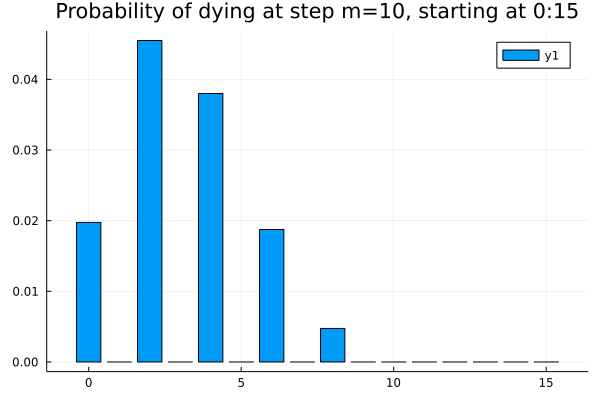

In [9]:
bar(dats
    ,title="Probability of dying at step m=10, starting at 0:15"
)

# Part B:

In [10]:
#Print mean and estimated variance
println("mean: ",Statistics.mean(exit_times))
println("variance: ", Statistics.var(exit_times))
println("standard deviation: ", Statistics.std(exit_times))

mean: 1463.78
variance: 9.510553245071267e7
standard deviation: 9752.206542660624


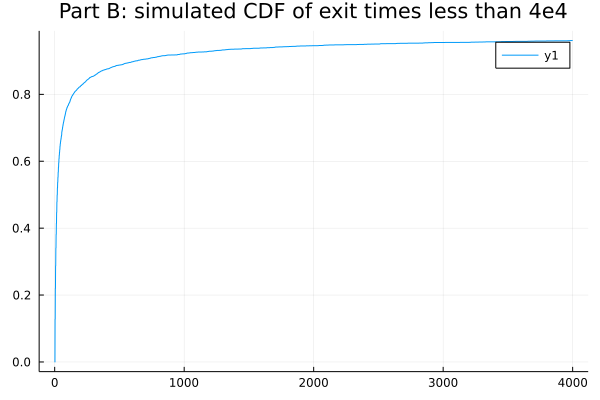

In [11]:
#Plot the simulated CDF of exit times, over the range of 0 to 400 time periods. 
# x0 = 2
plot([(i,sum(exit_times .< i)/N) for i=0:4000]
    ,title="Part B: simulated CDF of exit times less than 4e4")

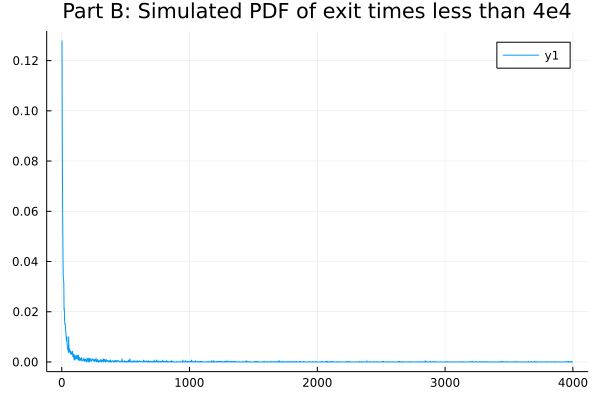

In [12]:
plot([(i, sum(exit_times .< i+1)/N - sum(exit_times .< i)/N) for i=2:2:4000]
    ,title="Part B: Simulated PDF of exit times less than 4e4"
    )
    